In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [42]:
#a)
#Your code:
# Load the CSV file using read_csv()
house_data = pd.read_csv('kc_house_data.csv')

# Show the first 5 records as head() method in pandas shows the first five records of a DataFrame by default
# Use display() for showing the data as a table
from IPython.display import display
display(house_data.head())

#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
#b) 
# Print the list of variables (column names)
print("Variable list:", house_data.columns.tolist())

# Define which variables should be treated as categorical based on domain knowledge
categorical_vars = ['date', 'id', 'waterfront', 'view', 'condition', 'grade', 'zipcode']
numerical_vars = [col for col in house_data.columns if col not in categorical_vars and house_data[col].dtype in ['float64', 'int64']]

# Create DataFrames for categorical and numerical variables
house_categorical_df = house_data[categorical_vars]
house_numerical_df = house_data[numerical_vars]

# Display the resulting DataFrames
print("\nCategorical Variables:")
display(house_categorical_df.head())

print("\nNumerical Variables:")
display(house_numerical_df.head())

Variable list: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Categorical Variables:


,date,id,waterfront,view,condition,grade,zipcode
0,20141013T000000,7129300520,0,0,3,7,98178
1,20141209T000000,6414100192,0,0,3,7,98125
2,20150225T000000,5631500400,0,0,3,6,98028
3,20141209T000000,2487200875,0,0,5,7,98136
4,20150218T000000,1954400510,0,0,3,8,98074



Numerical Variables:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,-122.045,1800,7503


In this code, I classify variables based on their context rather than strictly relying on their data type. While select_dtypes() is helpful, it only identifies object types as categorical by default, which misses integer-based categories like 'id', 'waterfront', 'view', 'condition', 'grade' and 'zipcode'.

These variables are inherently categorical, as they represent discrete or qualitative properties of the houses: 'id' variable serves as a unique identifier, 'waterfront' indicates a binary characteristic of water access, variables like 'view', 'condition', and 'grade' (although expressed as integers) represent ordered categories of quality rather than measurable quantities. Similarly, 'zipcode' is used as a geographical labels. Even if they are stored as integers, their function in the dataset is categorical. For this reason, we manually specify categorical variables to ensure the analysis reflects the actual structure and meaning of the data, allowing for more accurate insights and visualizations.

In [44]:
#c)
#Your code:
# Compute basic statistics for numerical variables
numerical_stats = house_numerical_df.describe()

# Display the statistics
print("Basic Statistics of Numerical Variables:")
print(numerical_stats)

#Hint: Function describe()

Basic Statistics of Numerical Variables:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       1.494309   1788.390691     291.509045   1971.005136     84.402258   
std    

**Are all of them meaningful?**

For most variables related to property attributes (such as 'price', 'bedrooms', 'bathrooms', 'sqft_living'), basic statistics are meaningful. However, some variables (such as 'lat' and 'long' for latitude and longitude) might not generate meaningful statistical insights for analysis, as they are in this case location coordinates that are better suited for grouping, filtering, or spatial analysis rather than basic statistical summaries.

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

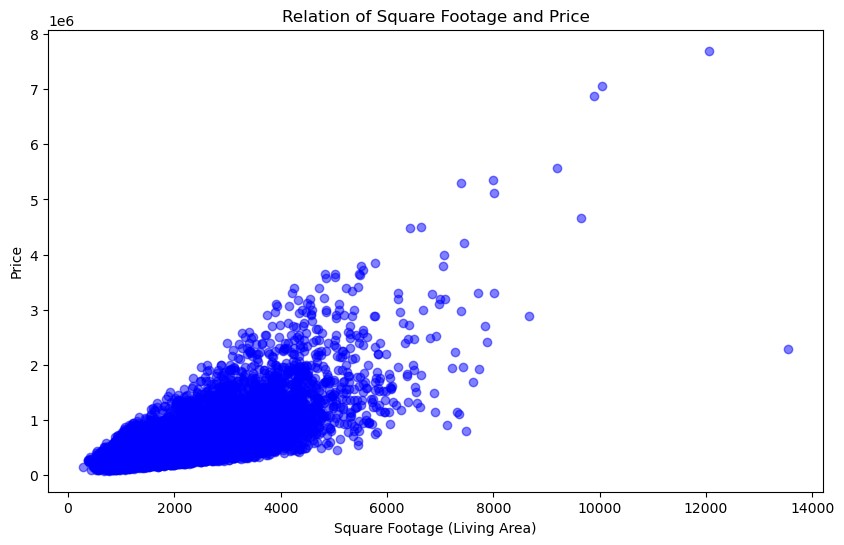

In [45]:
#a)
#Your code:
# Scatter plot: square footage vs. price
plt.figure(figsize=(10, 6))
plt.scatter(house_data['sqft_living'], house_data['price'], alpha=0.5, color='blue')
plt.title("Relation of Square Footage and Price")
plt.xlabel("Square Footage (Living Area)")
plt.ylabel("Price")
plt.show()

#Hint plt.scatter

This scatter plot shows a positive relationship between Square Footage and Price, with most homes clustered below 4,000 square feet and between $0-2 million. This indicates that larger homes generally cost more, though variability increases with size. Some outliers with exceptionally high square footage and price represent luxury properties. 

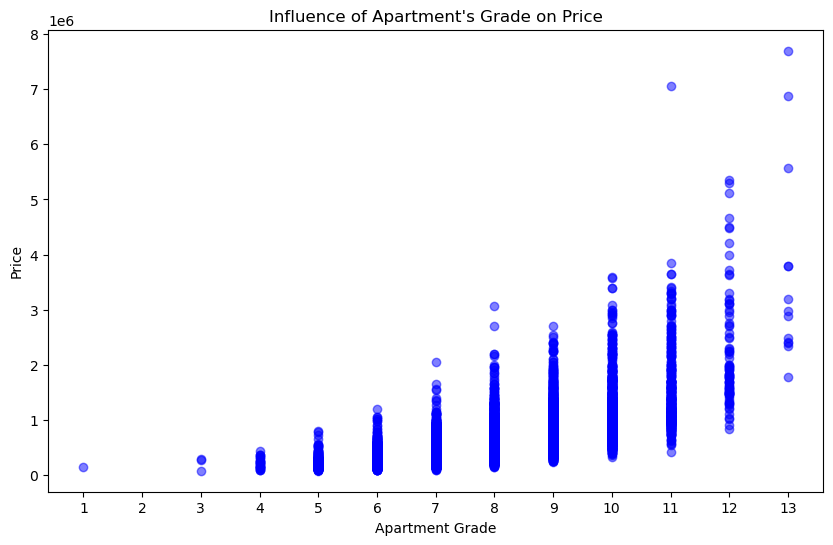

In [46]:
#b)
#Your code:
# Scatter plot: grade vs. price
plt.figure(figsize=(10, 6))
plt.scatter(house_data['grade'], house_data['price'], alpha=0.5, color='blue')
plt.title("Influence of Apartment's Grade on Price")
plt.xlabel("Apartment Grade")
plt.ylabel("Price")
plt.xticks(range(int(house_data['grade'].min()), int(house_data['grade'].max()) + 1, 1))
plt.show()

This scatter plot illustrates the influence of an apartment's grade on its price. We see a clear upward trend, where higher-grade apartments tend to have significantly higher prices. The majority of apartments are clustered in the middle grade range (around 6 to 10), with prices rising gradually. However, higher-grade properties (grades 11 to 13) exhibit greater price variability, likely due to luxury features and location factors. This correlation between grade and price confirms that Apartment Grade is a key factor influencing property value.

Variables correlated with price:
 price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


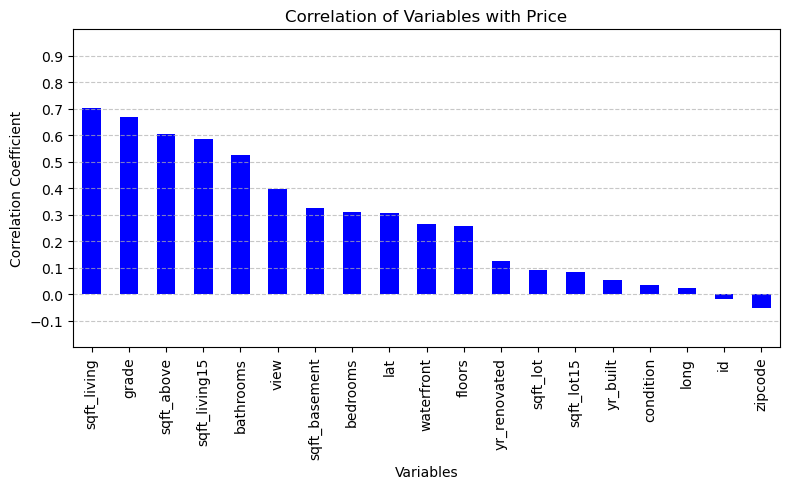

In [47]:
# Correlation analysis for other variables influencing price
correlations = house_data.corr()['price'].sort_values(ascending=False)
print("Variables correlated with price:\n", correlations)

# Plot the correlations as a vertical bar chart
plt.figure(figsize=(8, 5))
correlations.drop('price').plot(kind='bar', color='blue')
plt.title("Correlation of Variables with Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Variables")
plt.ylim(-0.2, 1)  # Set y-axis limits from -0.2 to 1
plt.yticks(np.arange(-0.1, 1.0, 0.1))  # Set y-axis ticks from -0.2 to 1 in steps of 0.1
plt.xticks(rotation=90)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Other variables apart from 'sqft_living' and 'grade' that could be relevant for studying our target (the price of the houses) are sqft_above (0.605567), sqft_living15 (0.585379) and bathrooms (0.525138) as each has a correlation coefficient above 0.5, indicating a moderate to strong positive relationship with price. These variables, due to their significant correlations with house price, provide useful insights and could serve as strong predictors in a model aiming to estimate property values.

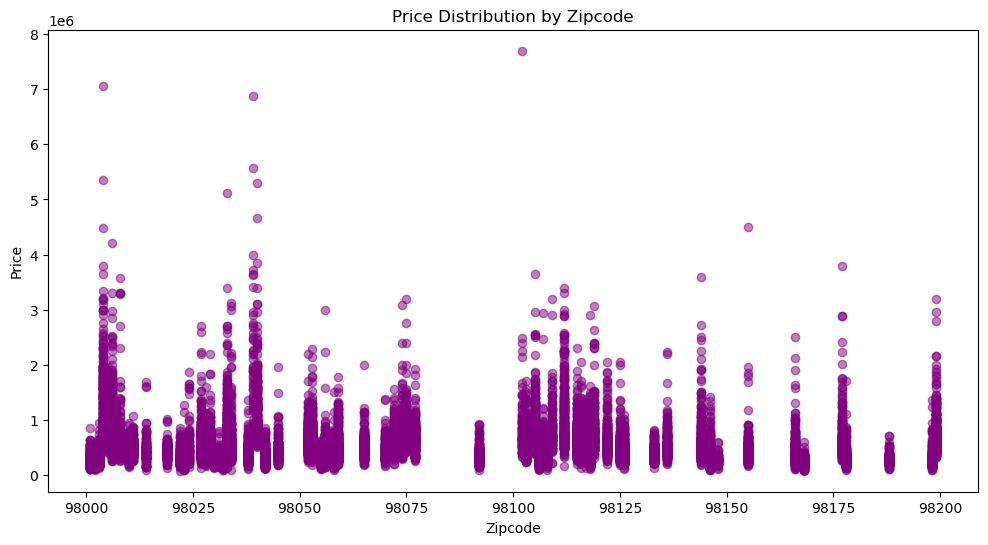

In [48]:
#c)
#Your code:
# Scatter plot: zipcode vs. price
plt.figure(figsize=(12, 6))
plt.scatter(house_data['zipcode'], house_data['price'], alpha=0.5, color='purple')
plt.title("Price Distribution by Zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()


This scatter plot shows the distribution of house prices across various zip codes. There is a noticeable variation in prices depending on the area, with certain zip codes exhibiting a concentration of higher-priced homes, especially around the  $1-3M range. The price distribution is uneven, suggesting that some areas are generally more expensive than others. Zip codes with consistently lower price points may indicate more affordable neighborhoods, while those with more outliers on the higher end could represent premium or luxury areas. This insight can help identify which regions might align with specific budget constraints or investment goals.

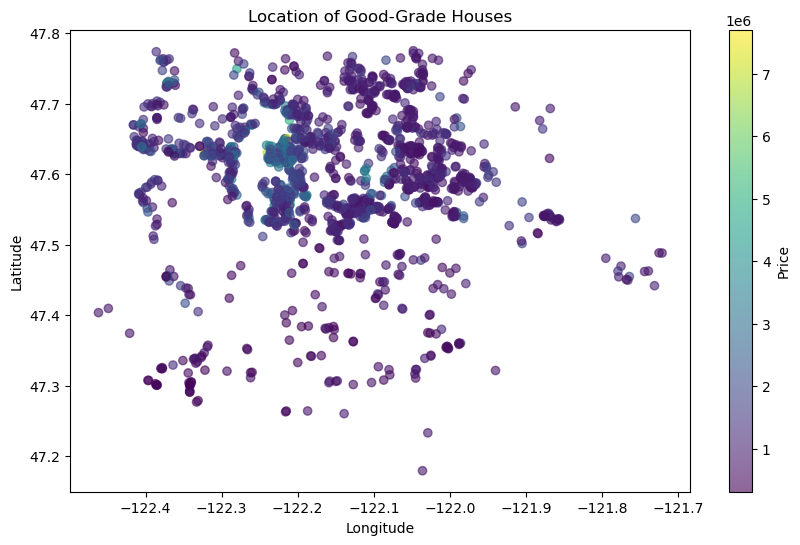

In [49]:
#Your code:
# Scatter plot: longitude and latitude for Good-grade apartments
plt.figure(figsize=(10, 6))
good_grade_houses = house_data[house_data['grade'] >= 10]  # Filter apartments with good grades
plt.scatter(good_grade_houses['long'], good_grade_houses['lat'], c=good_grade_houses['price'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Price')
plt.title("Location of Good-Grade Houses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


This scatter plot visualizes the geographical distribution of good-grade houses based on their latitude and longitude coordinates. The color gradient represents the price, with lighter colors indicating higher prices and darker shades representing lower prices. From the plot, we can observe clusters of good-grade houses in specific areas, with the densest concentrations around certain latitude and longitude ranges, likely representing popular or high-value neighborhoods. The pattern suggests that houses' grade and price are not only influenced by quality but also by location, with certain geographic clusters correlating with higher-priced, good-grade houses.

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

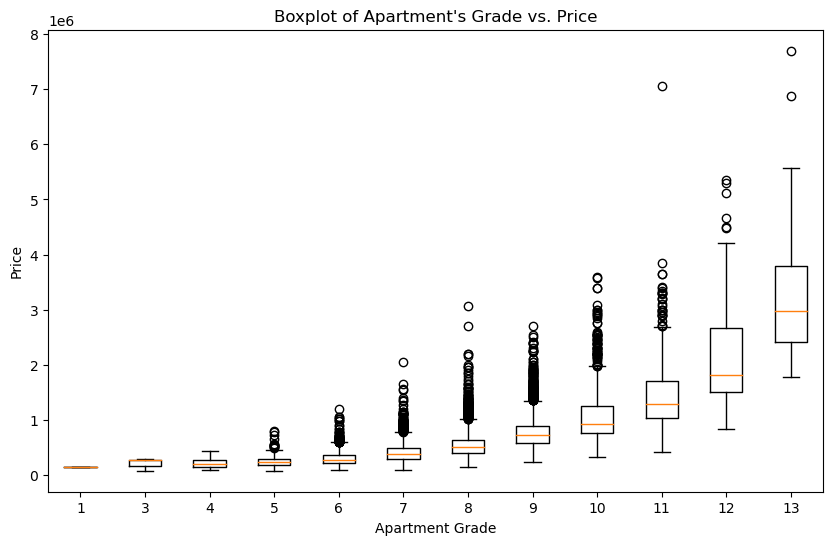

In [50]:
#a)
# Boxplot: Apartment grade vs. price
plt.figure(figsize=(10, 6))
plt.boxplot([house_data[house_data['grade'] == g]['price'] for g in sorted(house_data['grade'].unique())])
plt.xticks(range(1, len(house_data['grade'].unique()) + 1), sorted(house_data['grade'].unique()))
plt.title("Boxplot of Apartment's Grade vs. Price")
plt.xlabel("Apartment Grade")
plt.ylabel("Price")
plt.show()

#Hint: plt.boxplot

The boxplot shows the distribution of prices for each grade level. Each box represents the interquartile range (IQR), and the whiskers extend to show the range of the data, excluding outliers which are plotted as individual points. It highlights the spread and median price within each grade. This makes it easier to see the variability in prices at different grade levels, as well as identify the presence of outliers (particularly noticeable for higher-grade apartments).

On the other hand, the scatter plot from exercise 2b shows each individual data point for the price at each grade level, with dots representing apartments. The scatter plot reveals the upward trend of prices as grade increases, and it also shows the density of data points within each grade. It provides a clear view of all individual prices at each grade level. It’s easier to see where the majority of data points lie, giving insight into the distribution density of prices for each grade.

Together, they offer complementary perspectives: the boxplot focuses on summary statistics and outliers, while the scatter plot provides detailed insights into each data point's position, but if I had to choose one, I’d go with the boxplot. It provides a clearer summary of how price varies by grade, showing the median, range, and outliers for each grade level. This makes it easy to see both the typical price for each grade and the variability within each grade, which is useful for quick insights without being overwhelmed by individual data points.

**Exercise 3b is done at the end of the notebook as I convert the varibale 'grade' into categorical and it is used in other plots, so it does not disturb**

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [51]:
#a)
#Your code:
# Filter apartments with 3 bedrooms, 2 bathrooms, and 2 floors using .loc
selected_apartments = house_data.loc[
    (house_data['bedrooms'] == 3) & 
    (house_data['bathrooms'] == 2) & 
    (house_data['floors'] == 2)
]

# Compute basic statistics for the selected apartments
basic_stats = selected_apartments.describe()
print("Basic Statistics for Apartments with 3 Bedrooms, 2 Bathrooms, and 2 Floors:")
print(basic_stats)

#Hint: pandas.DataFrame.loc

Basic Statistics for Apartments with 3 Bedrooms, 2 Bathrooms, and 2 Floors:
                 id         price  bedrooms  bathrooms  sqft_living  \
count  1.540000e+02  1.540000e+02     154.0      154.0   154.000000   
mean   4.397177e+09  5.144986e+05       3.0        2.0  1850.279221   
std    2.849813e+09  2.497661e+05       0.0        0.0   547.585413   
min    7.600057e+06  2.090000e+05       3.0        2.0  1020.000000   
25%    2.060901e+09  3.769750e+05       3.0        2.0  1452.500000   
50%    3.630010e+09  4.640000e+05       3.0        2.0  1700.000000   
75%    7.184074e+09  5.894625e+05       3.0        2.0  2127.500000   
max    9.829200e+09  1.755000e+06       3.0        2.0  3650.000000   

            sqft_lot  floors  waterfront        view   condition       grade  \
count     154.000000   154.0  154.000000  154.000000  154.000000  154.000000   
mean    23678.948052     2.0    0.006494    0.357143    3.435065    7.551948   
std     83324.024708     0.0    0.080582    

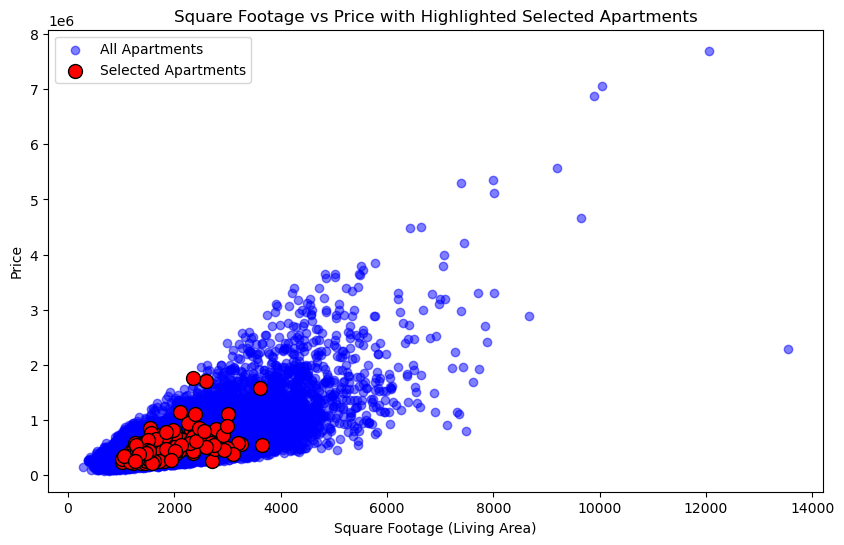

In [52]:
#b)
#Your code:
# Scatter plot for 'square footage' vs. 'price' with highlighted selected apartments
plt.figure(figsize=(10, 6))

# Original scatter plot for all data
plt.scatter(house_data['sqft_living'], house_data['price'], alpha=0.5, color='blue', label='All Apartments')

# Highlight selected apartments. Selected_apartments is the variable which contains the filter asked for doing exercise 4
plt.scatter(selected_apartments['sqft_living'], selected_apartments['price'], color='red', edgecolor='black', marker='o', s=100, label='Selected Apartments')

# Plot labels and legend
plt.title("Square Footage vs Price with Highlighted Selected Apartments")
plt.xlabel("Square Footage (Living Area)")
plt.ylabel("Price")
plt.legend()
plt.show()


This scatter plot shows the relationship between square footage and price for a set of apartments, with the selected apartments (highlighted in red) having three bedrooms, two bathrooms, and two floors. These selected apartments are clustered in the lower range of both square footage (below 4,000 sq ft) and price (under $2 million), indicating that apartments with these specific features are generally smaller and more affordable compared to the broader market (shown in blue). The trend suggests that, while price increases with size overall, apartments with this configuration remain in a more moderate range, aligning with a lower cost, mid-sized housing segment within the market.

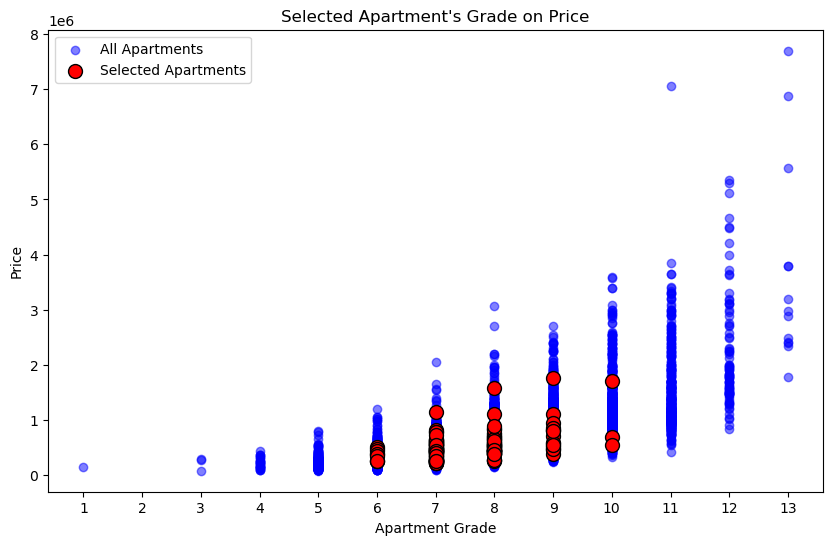

In [53]:
# Scatter plot for 'grade' vs 'price' with highlighted selected apartments
plt.figure(figsize=(10, 6))

# Original scatter plot for all data
plt.scatter(house_data['grade'], house_data['price'], alpha=0.5, color='blue', label='All Apartments')

# Highlight selected apartments. Selected_apartments is the variable which contains the filter asked for doing exercise 4
plt.scatter(selected_apartments['grade'], selected_apartments['price'], color='red', edgecolor='black', marker='o', s=100, label='Selected Apartments')

# Plot labels and legend
plt.title("Selected Apartment's Grade on Price")
plt.xlabel("Apartment Grade")
plt.ylabel("Price")
plt.xticks(range(int(house_data['grade'].min()), int(house_data['grade'].max()) + 1, 1))
plt.legend()
plt.show()

Selected apartments with 3 bedrooms, 2 bathrooms, and 2 floors are primarily clustered within grades 6-10, showing a wide price range within each grade. This suggests that factors beyond grade, such as size, view, and location, significantly influence pricing. Some selected apartments command higher prices than apartments with higher grades, likely due to unique features or prime locations. However, the majority of selected apartments are priced below the average for their grade, potentially offering good value.

In [54]:
#c)
#Your code:
# Filter apartments with 3 bedrooms, 2 bathrooms, and 2 floors using .loc. This first part of the code could be ignored as it is the same filter from exercise 4a
selected_apartments = house_data.loc[
    (house_data['bedrooms'] == 3) & 
    (house_data['bathrooms'] == 2) & 
    (house_data['floors'] == 2)
]

# Calculate price-to-footage ratio
selected_apartments = selected_apartments.copy()  # Avoid SettingWithCopyWarning
selected_apartments['price_per_sqft'] = selected_apartments['price'] / selected_apartments['sqft_living']

# Sort apartments by price_per_sqft in ascending order to find the best deals. I we want to show more than 5 apartments we only have to change the value from 'head'
best_price_ratio_apartments = selected_apartments.sort_values(by='price_per_sqft').head(5)

# Display the top apartments with the best price to Footage ratio
print("Top Apartments with Best Price to Footage Ratio:")
print(best_price_ratio_apartments[['price', 'sqft_living', 'price_per_sqft']].set_index(best_price_ratio_apartments.index))


#Hint: .loc, .sort_values(), .index

Top Apartments with Best Price to Footage Ratio:
          price  sqft_living  price_per_sqft
9704   260000.0         2710       95.940959
11258  379900.0         3110      122.154341
19880  210000.0         1580      132.911392
16014  252500.0         1810      139.502762
20906  274900.0         1936      141.993802


## Exercise 3b

<Figure size 1600x1000 with 0 Axes>

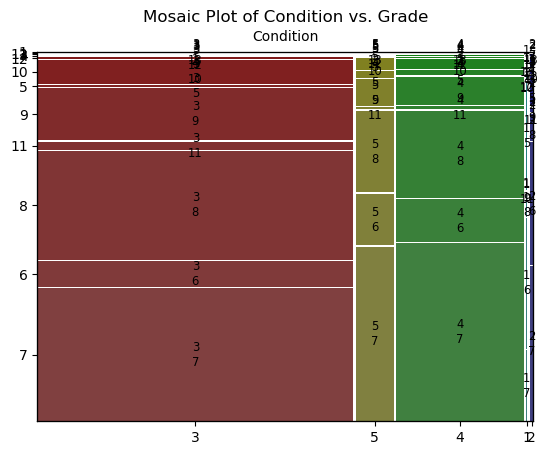

In [55]:
from statsmodels.graphics.mosaicplot import mosaic

# Convert to string to ensure they are treated as categorical variables
house_data['condition'] = house_data['condition'].astype(str)
house_data['grade'] = house_data['grade'].astype(str)

# Create the mosaic plot
plt.figure(figsize=(16, 10))
mosaic(house_data, ['condition', 'grade'], title='Mosaic Plot of Condition vs. Grade')
plt.xlabel('Condition')
plt.ylabel('Grade')
plt.show()

I choose a mosaic plot between 'condition' and 'grade' as it is a valuable option because these variables capture complementary aspects of housing quality that likely influence property values. Condition reflects the current state of the house, indicating whether it is well-maintained or in need of repairs, while grade provides an assessment for the houses. Visualizing the relationship between these two categorical variables in a mosaic plot allows us to explore how maintenance status (condition) aligns with structural quality (grade) and identify any patterns or associations between them.

Higher'grad' values (above 10) are mainly associated with condition levels 3 and 4, but even these higher grades are less common. Lower grades (like 3-6) are dispersed across conditions, though they are more frequent in properties with lower condition ratings (1 and 2). This suggests that properties in average to good condition (3 and 4) tend to have a wider range of 'grade' levels, whereas very low or high conditions restrict the range of grades.